# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [3]:
employee = pd.read_csv("/content/Employee.csv")
print(employee.shape)
employee.head(10)


(9, 7)


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways.


In [ ]:
# 1. Group by
mean_salary = employee.groupby(["Department"]).agg({"Salary":"mean"})
mean_salary


,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [4]:
# 2. Pivot tables
p_mean_salary = employee.pivot_table( index= "Department", values = "Salary", aggfunc="mean")
p_mean_salary

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [5]:
p_mean_salary_2 = employee.pivot_table(index=["Department", "Title"], values=["Salary"], aggfunc={"Salary": "mean"})
p_mean_salary_2

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [6]:
p_mean_salary_3 = employee.pivot_table(index=["Years", "Title", "Department"], values=["Salary"], aggfunc={"Salary": "mean"})
p_mean_salary_3

Salary
Years Title     Department        
1     analyst   IT              35
2     analyst   HR              30
                IT              30
      associate Sales           55
3     associate Sales           55
4     analyst   HR              35
7     associate IT              60
8     VP        HR              70
                IT              70

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [7]:
p_mean_salary_4 = employee.pivot_table(index = ["Title", "Department"], values = ["Salary"], aggfunc={"Salary": "mean", "Department": "count"})
p_mean_salary_4

Department  Salary
Title     Department                    
VP        HR                   1    70.0
          IT                   1    70.0
analyst   HR                   2    32.5
          IT                   2    32.5
associate IT                   1    60.0
          Sales                2    55.0

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [8]:
p_mean_salary_5 = employee.pivot_table(index = ["Title", "Department"], values = ["Salary"], aggfunc={"Salary": ["mean","min","max","std"]})
p_mean_salary_5

Salary                    
                        max  mean min       std
Title     Department                           
VP        HR             70  70.0  70       NaN
          IT             70  70.0  70       NaN
analyst   HR             35  32.5  30  3.535534
          IT             35  32.5  30  3.535534
associate IT             60  60.0  60       NaN
          Sales          55  55.0  55  0.000000

#### Based on your comments, fill the missing values with an appropriate value.

In [9]:
p_mean_salary_5_1 = employee.pivot_table(index = ["Title", "Department"], values = ["Salary"], aggfunc={"Salary": ["mean","min","max","std"]}, fill_value = "0")
p_mean_salary_5_1

# when std is zero signifies that the values in the dataset are constant,equal -> they are not "far" from the mean

Salary                    
                        max  mean min       std
Title     Department                           
VP        HR             70  70.0  70         0
          IT             70  70.0  70         0
analyst   HR             35  32.5  30  3.535534
          IT             35  32.5  30  3.535534
associate IT             60  60.0  60         0
          Sales          55  55.0  55       0.0

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information?

In [10]:
p_mean_salary_6 = employee.pivot_table(index = ["Department"], values = ["Salary"], aggfunc={"Salary": "sum", "Department": "count"})
p_mean_salary_6


,Department,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [11]:
p_mean_salary_7 = employee.pivot_table(index = ["Department", "Title"], values = ["Years", "Salary"], aggfunc={"Years": "sum", "Salary": "mean"})
p_mean_salary_7

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [ ]:
# your answer here


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [13]:
fitbit = pd.read_csv("/content/Fitbit.csv")
print(fitbit.shape)
fitbit.head()


(367, 14)


,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [ ]:
print("Fitbit data types:")
print(fitbit.dtypes)

In [ ]:
print("Fitbit statistics:")
fitbit.describe()

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [16]:
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt

linear = pearsonr(fitbit["Minutes Very Active"], fitbit["Steps"])[0]
linear_1 = spearmanr(fitbit["Minutes Very Active"], fitbit["Steps"])[0]
print("pearson: ", linear)
print("spearman: ", linear_1)
# moderate positive linear relationship between the variables (?!)

pearson:  0.5714518481062606
spearman:  0.6321453084956241


#### Use matplotlib to visually plot Minutes Very active vs Steps.

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

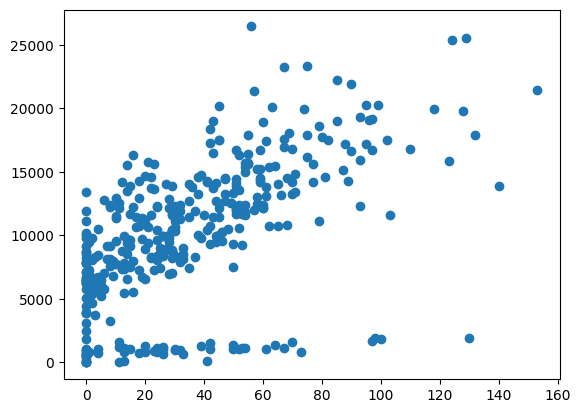

In [18]:
Mins_and_Steps = plt.scatter( x =fitbit["Minutes Very Active"], y = fitbit["Steps"])
Mins_and_Steps

#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
"""We can say that there is a moderate (and) positive relationship between the minutes spent being very active and total number of steps taken per individual.
This states that when you have someone being very active, there will be a tendency for the number of steps taken increase.
It's not a perfect correlation, but they are sure connected.
For example if someone is doing 5 x 400 m  sprints, those are very active minutes and will also increase the number of steps.
On the other hand, we have a big concentration of zero minutes active, but people with a lot of steps, creating some skewness/outliers (?)"""

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [19]:
linear_2 = pearsonr(fitbit["Minutes Sedentary"], fitbit["Steps"])[0]
linear_3 = spearmanr(fitbit["Minutes Sedentary"], fitbit["Steps"])[0]
print("pearson: ", linear_2)
print("spearman: ", linear_3)
# very sad trombone

pearson:  0.0769060806299009
spearman:  -0.12199693227604608


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

Date                      08-05-2015
Calorie burned                  1934
Steps                            905
Distance                        0.65
Floors                             0
Minutes Sedentary              1.355
Minutes Lightly Active            46
Minutes Fairly Active              0
Minutes Very Active                0
Activity Calories               1680
MinutesOfSleep                   384
MinutesOfBeingAwake               26
NumberOfAwakings                  23
LengthOfRestInMinutes            417
Name: 0, dtype: object


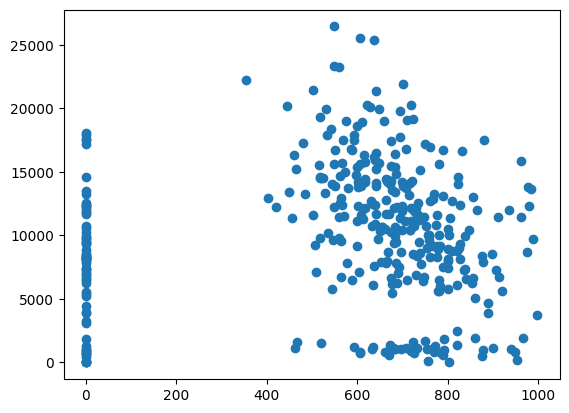

In [20]:
Sed_and_Steps = plt.scatter( x =fitbit["Minutes Sedentary"], y = fitbit["Steps"])

""" So, very surprised with this weak relationship. I really think we can state that probably people
use the fitbit ONLY when doing the activity, but actually the individual is still being active the rest of the day but not into account.
Just wondering...just check this: """
print(fitbit.loc[0])
# this guy wasted 1680 calories being active and only one minute of the day sedentary with 905 steps. So, we went to the gym and used for
#row machine or bike, and then took the fitbit band.

In [ ]:
""" we have a lot of people with 0 min sedentary and a lot of steps (activity), so I believe that they just use the band in activity mode,
and don't use it for the rest of day, so the band is assuming the person is completely inactive or off"""

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [21]:
linear_4 = pearsonr(fitbit["MinutesOfSleep"], fitbit["Steps"])[0]
linear_5 = spearmanr(fitbit["MinutesOfSleep"], fitbit["Steps"])[0]
print("pearson: ", linear_4)
print("spearman: ", linear_5)

pearson:  0.13098565950836383
spearman:  0.09310892758263727


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

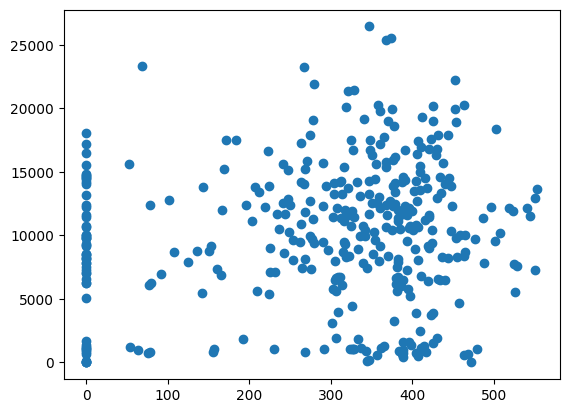

In [22]:
Sleep_and_Steps = plt.scatter( x =fitbit["MinutesOfSleep"], y = fitbit["Steps"])

### people just don't use the watch while sleeping so this will create big outliers. In this case, If I was really analyzing sleep, I would
### drop data with 0 min sleep, because either the wacth is not assuming rigth "sleep time" or people just don't use during sleep.

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [23]:
selected_columns = ["Calorie burned", "Minutes Sedentary","Floors", "Steps","Minutes Very Active", "MinutesOfSleep"]
cor_fit = fitbit[selected_columns]
correlation_matrix = cor_fit.corr()

In [24]:
# Save the results in the variable cor_fit
correlation_matrix_variable = correlation_matrix
correlation_matrix

,Calorie burned,Minutes Sedentary,Floors,Steps,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.125353,0.130757,0.255305,0.197881,0.011485
Minutes Sedentary,0.125353,1.000000,0.057812,0.076906,0.105963,0.204242
Floors,0.130757,0.057812,1.000000,0.306511,0.399503,0.069464
Steps,0.255305,0.076906,0.306511,1.000000,0.571452,0.130986
Minutes Very Active,0.197881,0.105963,0.399503,0.571452,1.000000,0.108018
MinutesOfSleep,0.011485,0.204242,0.069464,0.130986,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [25]:
sorted_steps = correlation_matrix.sort_values(by ="Steps", ascending = False)
sorted_steps
# answer: "Minutes Very Active"

,Calorie burned,Minutes Sedentary,Floors,Steps,Minutes Very Active,MinutesOfSleep
Steps,0.255305,0.076906,0.306511,1.000000,0.571452,0.130986
Minutes Very Active,0.197881,0.105963,0.399503,0.571452,1.000000,0.108018
Floors,0.130757,0.057812,1.000000,0.306511,0.399503,0.069464
Calorie burned,1.000000,0.125353,0.130757,0.255305,0.197881,0.011485
MinutesOfSleep,0.011485,0.204242,0.069464,0.130986,0.108018,1.000000
Minutes Sedentary,0.125353,1.000000,0.057812,0.076906,0.105963,0.204242


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [27]:
# your answer here
import seaborn as sns
time_grades = pd.read_csv("/content/Time_Grades.csv")
time_grades.head(10)

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

<ipython-input-28-9340c81754fe>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_grades["Study time"])


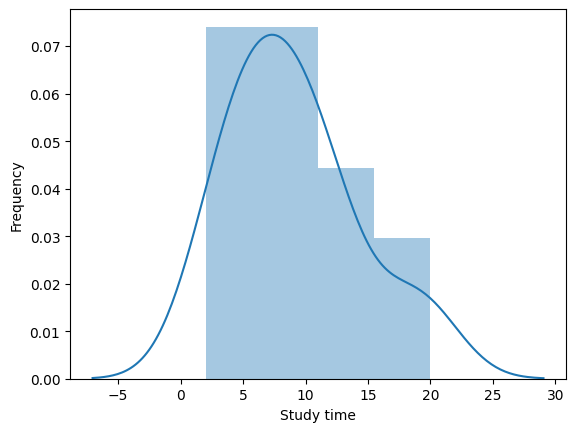

In [28]:
sns.distplot(time_grades["Study time"])
plt.xlabel("Study time")
plt.ylabel("Frequency")
plt.show()

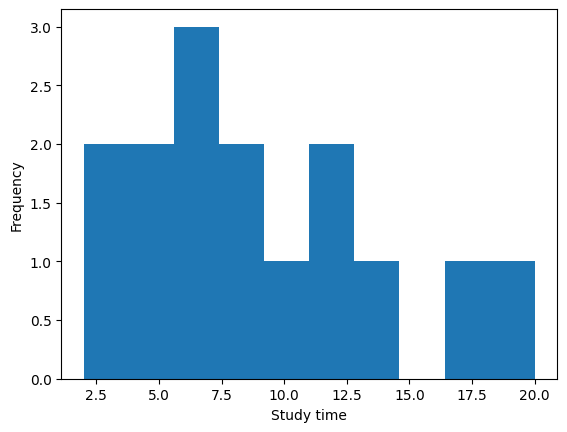

In [29]:
plt.hist(time_grades["Study time"])
plt.xlabel("Study time")
plt.ylabel("Frequency")
plt.show()

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [30]:
corr_1 = pearsonr(time_grades["Study time"], time_grades["Grade"])[0]
corr_2 = spearmanr(time_grades["Study time"], time_grades["Grade"])[0]
print("pearson: ", corr_1)
print("spearman: ", corr_2)
# Because pearson and spearman correlation coefficients are both close to 1, this indicates a strong positive relationship between study time and grade.

pearson:  0.7980456073578858
spearman:  0.819658753036942


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

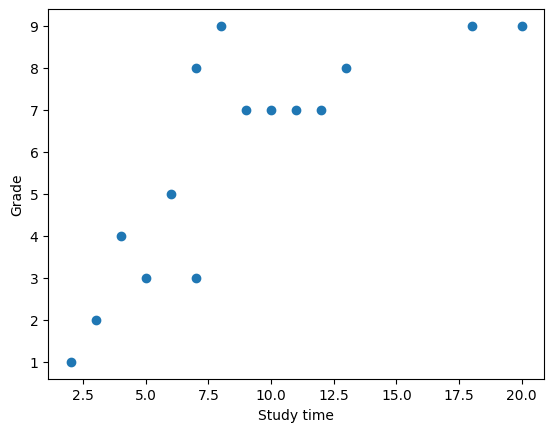

In [31]:
plt.scatter(time_grades["Study time"], time_grades["Grade"])
plt.xlabel("Study time")
plt.ylabel("Grade")
plt.show()
# as study time increases, there is a tendency for grades increase as well.
# because spearman is also positively and highly correlated, means that all observations tend in the same direction together

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md)

In [ ]:
# Between Pearson and Spearman, both provide the direction and strength of the "relationship" between 2 variables, from -1 to 1.
# While Pearson looks for a linear relationship, Spearman goes for a monotonic relantioship,  meaning that it does so by comparing the ranks of the points,
# rather than their absolute value.